___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [60]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
%matplotlib inline
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}
sns.set_style("whitegrid")



#### *ii. Load Dataset*

In [3]:
df = pd.read_csv("treetypes.csv").copy()
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.0,2748.505160,418.300975,1859.0,2375.0,2753.0,3108.0,3857.0
Aspect,250000.0,156.212172,109.652847,0.0,65.0,125.0,260.0,360.0
Slope,250000.0,16.331052,8.317490,0.0,10.0,15.0,22.0,65.0
Horizontal_Distance_To_Hydrology,250000.0,228.094032,209.630153,0.0,66.0,180.0,330.0,1390.0
Vertical_Distance_To_Hydrology,250000.0,50.897820,61.006967,-163.0,5.0,32.0,79.0,598.0
Horizontal_Distance_To_Roadways,250000.0,1719.966576,1330.817603,0.0,756.0,1318.0,2294.0,7112.0
Hillshade_9am,250000.0,212.370488,30.654582,0.0,195.0,220.0,235.0,254.0
Hillshade_Noon,250000.0,218.510700,22.680947,0.0,206.0,222.0,235.0,254.0
Hillshade_3pm,250000.0,134.502764,46.033892,0.0,106.0,137.0,167.0,252.0
Horizontal_Distance_To_Fire_Points,250000.0,1521.756904,1107.378373,0.0,734.0,1273.0,1998.0,7150.0


In [6]:
df.shape

(250000, 55)

In [8]:
for i in df.columns:
    print(df[i].value_counts())

2326    313
2305    300
2952    293
2304    292
2330    287
       ... 
3674      1
3842      1
3646      1
3775      1
3776      1
Name: Elevation, Length: 1983, dtype: int64
45     1450
90     1372
63     1239
135    1172
117    1172
       ... 
245     253
235     244
244     216
359     202
360       8
Name: Aspect, Length: 361, dtype: int64
10    12315
11    12268
12    11892
13    11885
15    11401
14    11276
9     11190
16    10733
8     10422
17    10043
18     9791
7      9289
19     9016
20     8401
6      8141
21     8077
22     7607
23     6919
5      6588
24     6284
25     6060
26     5462
4      5149
27     4984
28     4534
29     4023
30     3587
3      3545
31     3334
32     2716
33     2232
2      2140
34     1874
35     1489
36     1160
37      908
1       859
38      630
39      452
40      332
41      241
42      147
0       142
43      134
45       81
44       75
46       40
49       36
48       31
47       30
50       17
52        4
53        4
51        3
56  

In [11]:
for col in df.columns:
    print("Column", col, "has", df[col].nunique(), "unique values")

Column Elevation has 1983 unique values
Column Aspect has 361 unique values
Column Slope has 59 unique values
Column Horizontal_Distance_To_Hydrology has 1294 unique values
Column Vertical_Distance_To_Hydrology has 578 unique values
Column Horizontal_Distance_To_Roadways has 6501 unique values
Column Hillshade_9am has 207 unique values
Column Hillshade_Noon has 165 unique values
Column Hillshade_3pm has 253 unique values
Column Horizontal_Distance_To_Fire_Points has 6487 unique values
Column Wilderness_Area_1 has 2 unique values
Column Wilderness_Area_2 has 2 unique values
Column Wilderness_Area_3 has 2 unique values
Column Wilderness_Area_4 has 2 unique values
Column Soil_Type_1 has 2 unique values
Column Soil_Type_2 has 2 unique values
Column Soil_Type_3 has 2 unique values
Column Soil_Type_4 has 2 unique values
Column Soil_Type_5 has 2 unique values
Column Soil_Type_6 has 2 unique values
Column Soil_Type_7 has 2 unique values
Column Soil_Type_8 has 2 unique values
Column Soil_Type_9

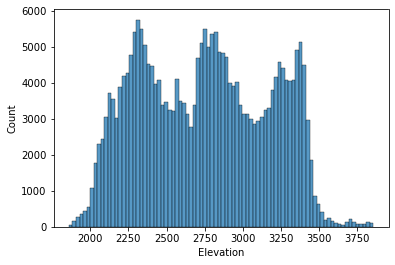

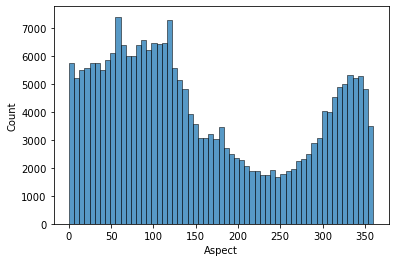

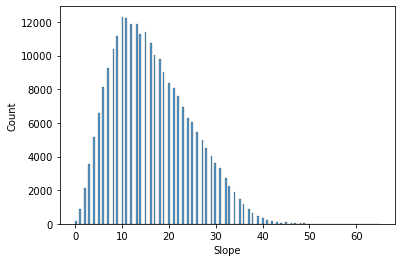

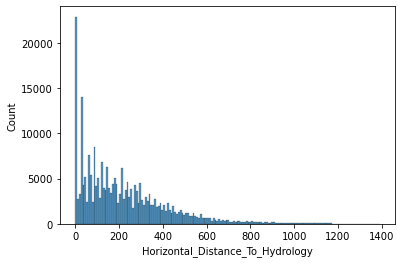

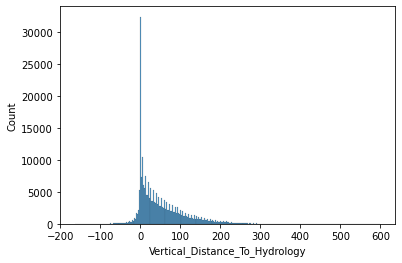

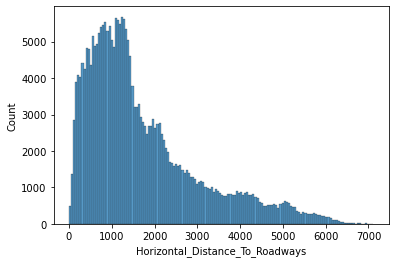

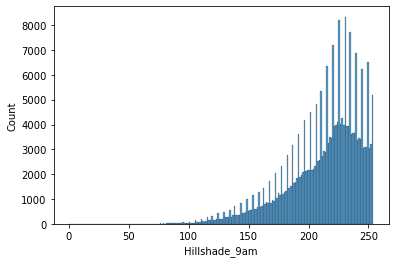

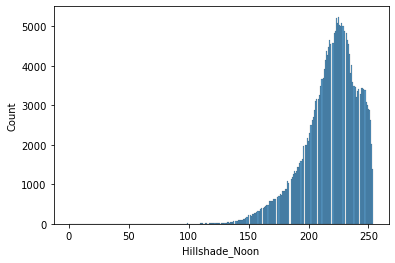

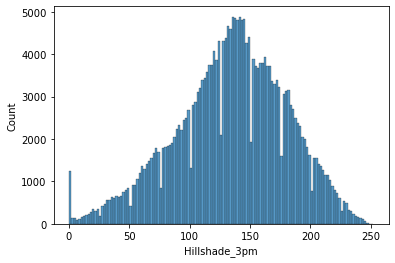

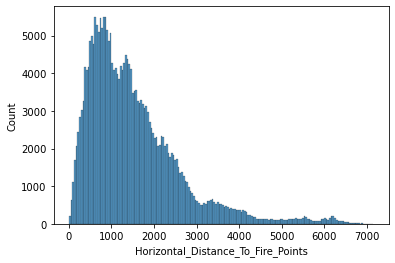

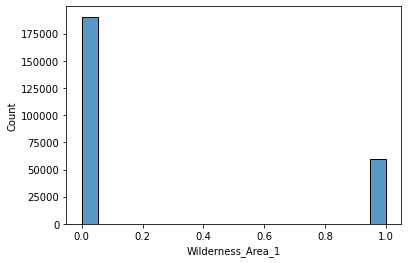

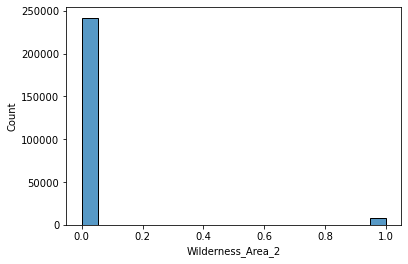

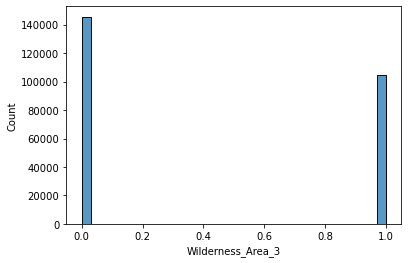

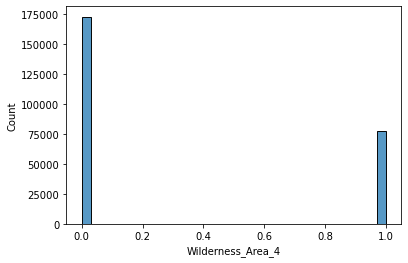

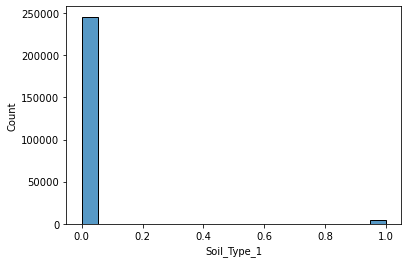

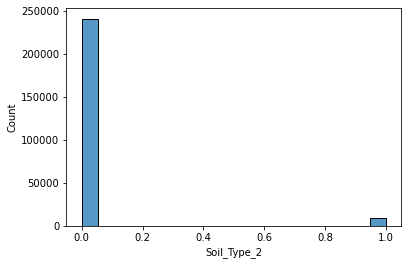

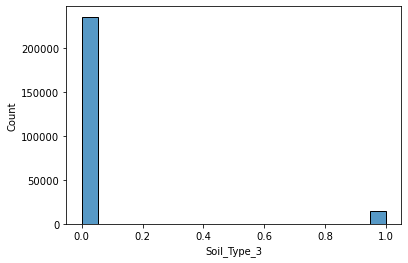

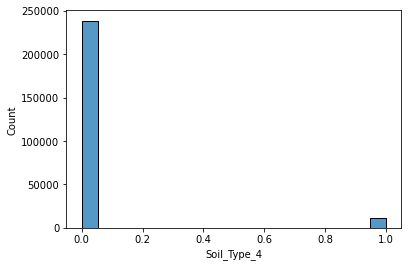

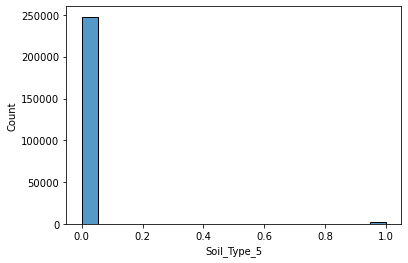

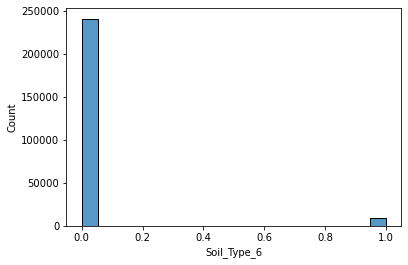

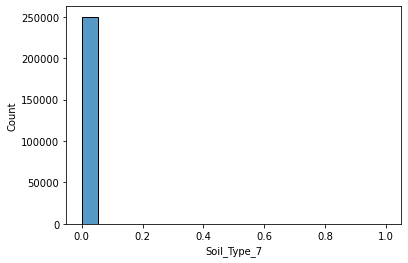

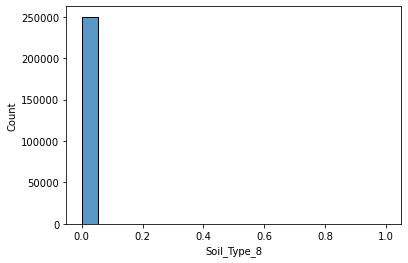

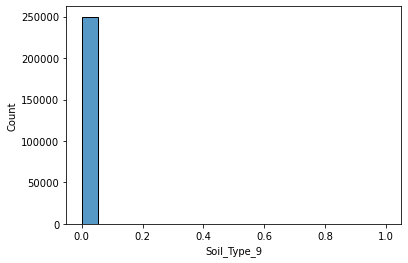

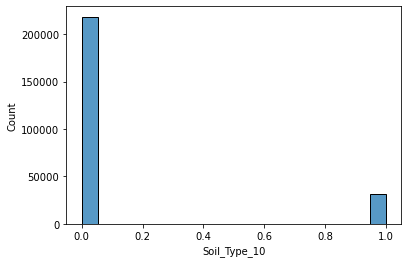

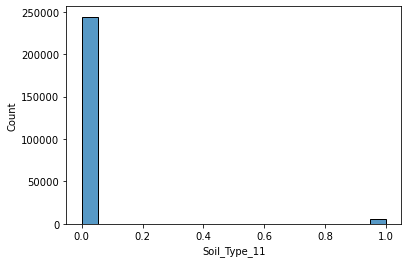

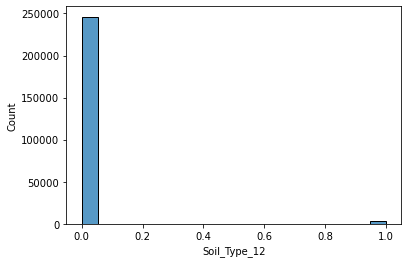

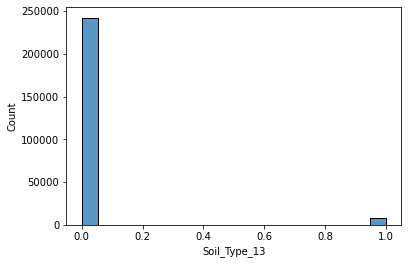

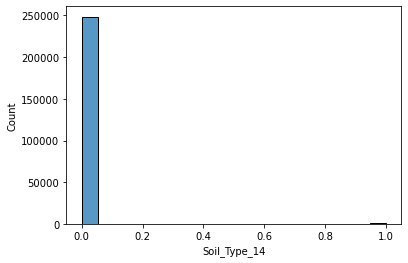

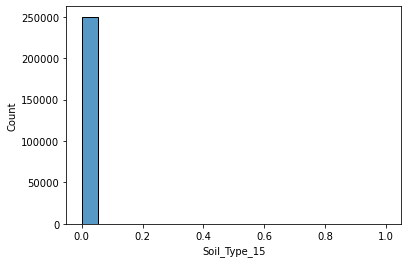

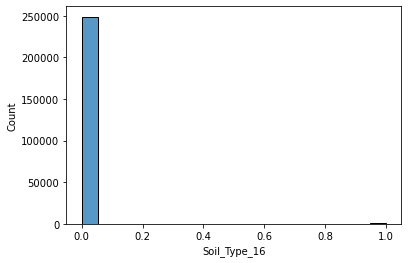

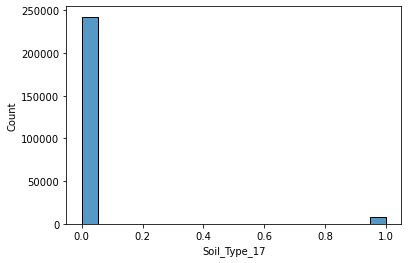

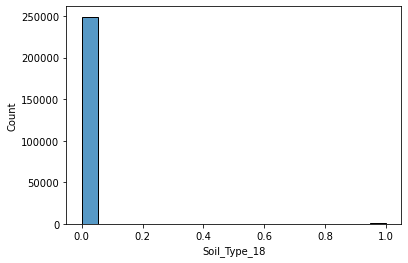

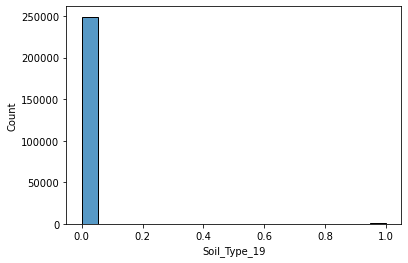

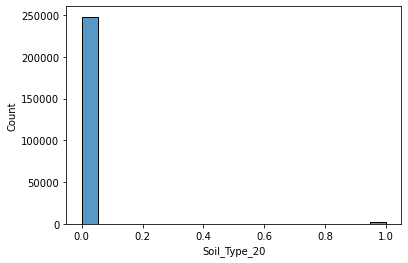

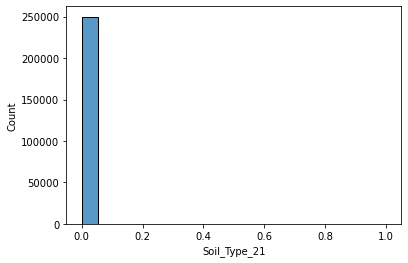

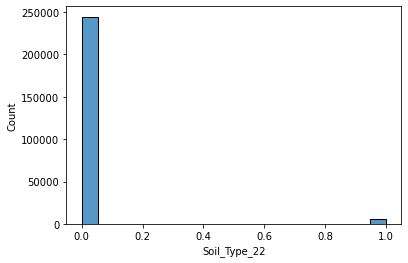

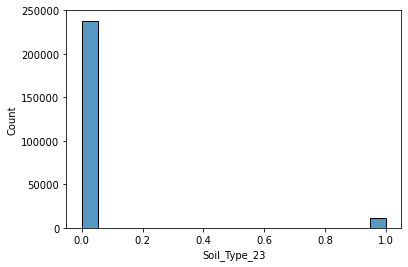

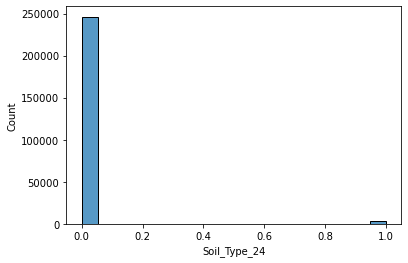

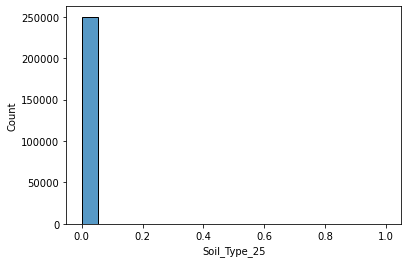

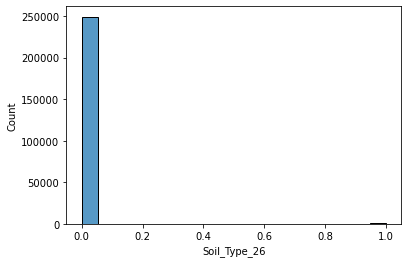

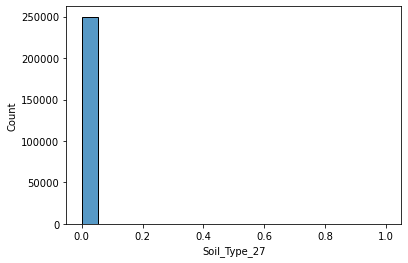

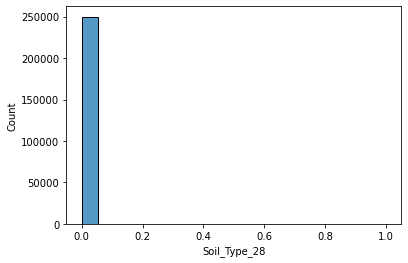

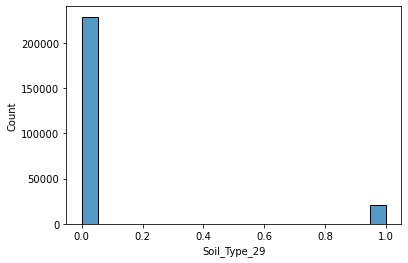

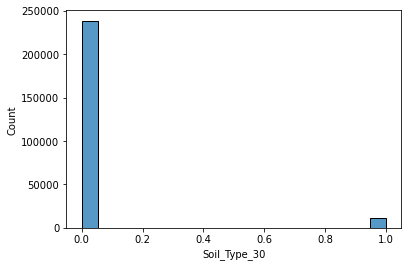

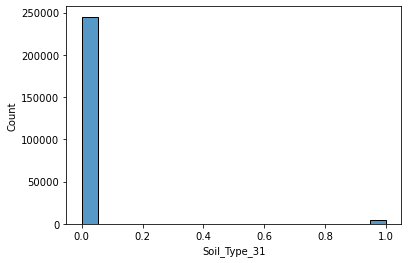

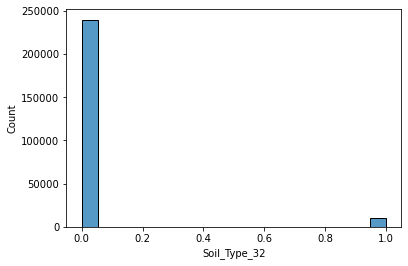

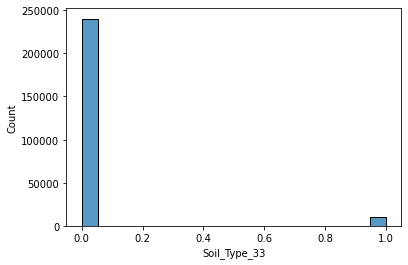

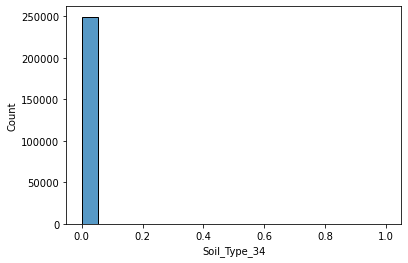

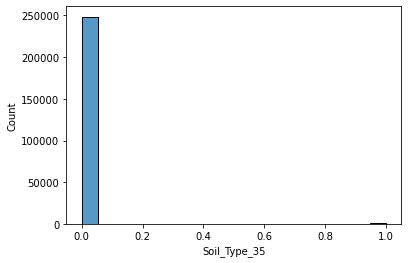

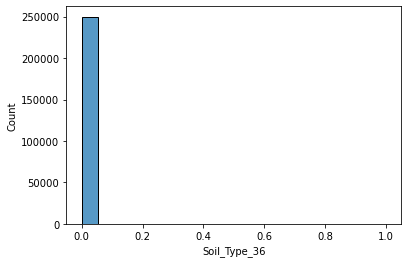

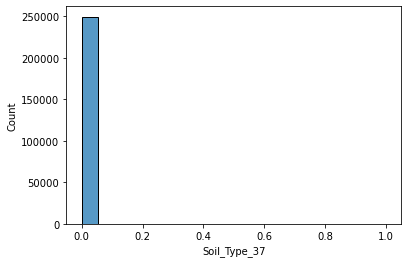

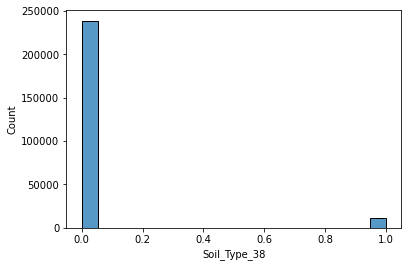

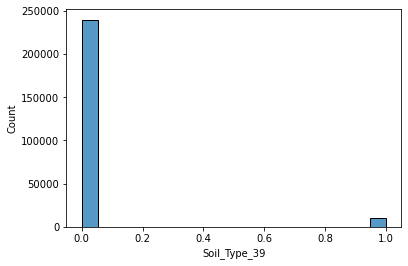

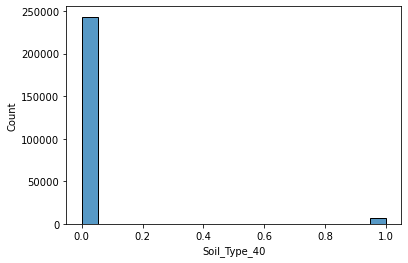

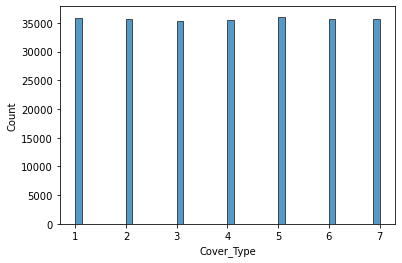

In [12]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

>### Summary results :
>- ``"Elevation"``, `"Slope"`, `"Horizontal_Distance_To_Hydrology"`, `"Vertical_Distance_To_Hydrology"`, `"Horizontal_Distance_To_Roadways"`, `"Horizontal_Distance_To_Fire_Points"` are continuous variables and their values vary.
>- `"Aspect"` is also continuous and its values vary from 0 to 360. It has angular values.
>- ``"Hillshade_3pm"``, ``"Hillshade_Noon"``, ``"Hillshade_3pm"`` are also continuos and their values vary from 0 to 255. This means that the values represent bitwise value. I concluded that the values are RGB color representation of the shadow at a particular time.
>- ``Wilderness_Areas`` and `Soil_Types` are categorical (binary 1 or 0) data.

5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64


<AxesSubplot:ylabel='Cover_Type'>

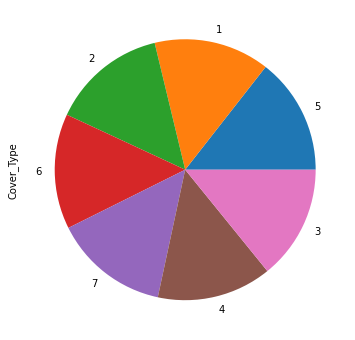

In [17]:
# There are 7 types of trees in the forest district.
print(df.Cover_Type.value_counts())
plt.figure(figsize=(10,6))
df.Cover_Type.value_counts().plot.pie()


***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [18]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [31]:
df.duplicated().value_counts()

False    247479
True       2521
dtype: int64

In [32]:
df.drop_duplicates(inplace = True, ignore_index=True)

In [33]:
df.duplicated().value_counts()

False    247479
dtype: int64

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [34]:
# to get list of continious features
numeric = []

for col in df.columns:
    if df[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


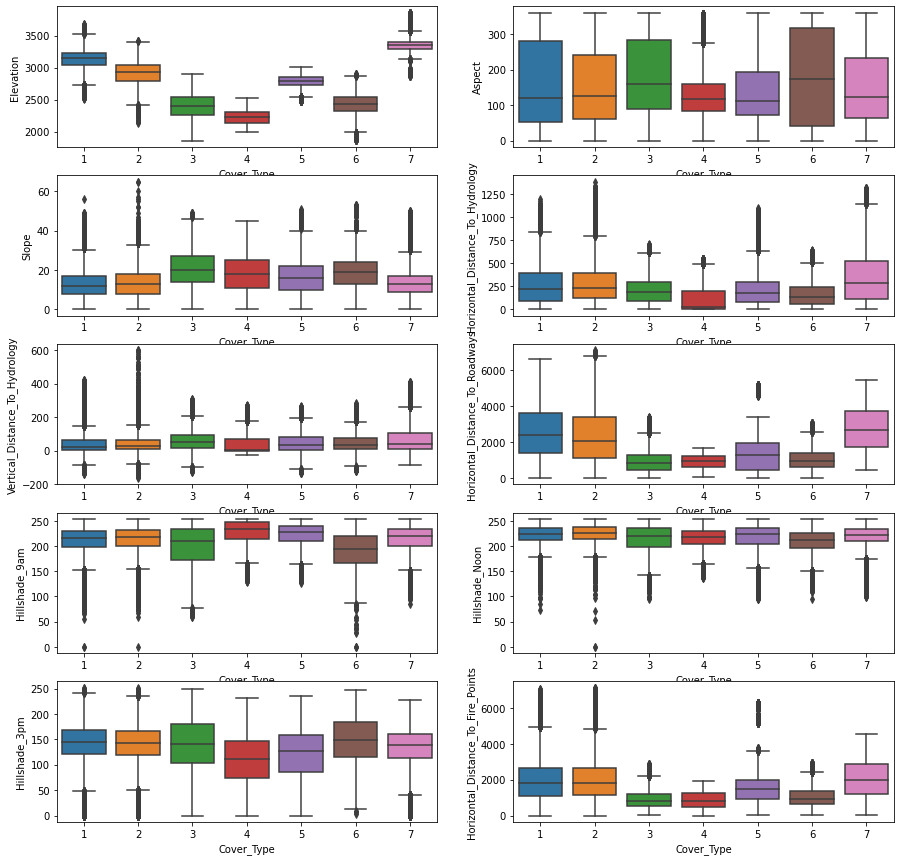

In [35]:
# Visually examine numeric features for outlies with boxplot for each class
fig , ax = plt.subplots(5,2,figsize=(15,15))
counter = 0
for i in range(5):
    for x in range(2):
        sns.boxplot(y = df[numeric[counter]] , x = df["Cover_Type"], ax=ax[i,x])
        counter +=1

In [36]:
# We can produce a function to get the number of outliers respectively each class. For the sake of practicality, we find the outliers for features without consideration of class distinction

def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [37]:
out_cols = []
for col in numeric:
    print(
        f"{col}\nlower:{detect_outliers(df, col,3)[0]} \nupper:{detect_outliers(df, col,3)[1]}\
        \noutlier:{detect_outliers(df, col,3)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,3)[2] > 0 :
        out_cols.append(col)
print(out_cols)        

Elevation
lower:183.0 
upper:5307.0        
outlier:0
*-*-*-*-*-*-*
Aspect
lower:-523.0 
upper:849.0        
outlier:0
*-*-*-*-*-*-*
Slope
lower:-26.0 
upper:58.0        
outlier:3
*-*-*-*-*-*-*
Horizontal_Distance_To_Hydrology
lower:-722.0 
upper:1119.0        
outlier:762
*-*-*-*-*-*-*
Vertical_Distance_To_Hydrology
lower:-217.0 
upper:301.0        
outlier:956
*-*-*-*-*-*-*
Horizontal_Distance_To_Roadways
lower:-3879.0 
upper:6943.0        
outlier:10
*-*-*-*-*-*-*
Hillshade_9am
lower:75.0 
upper:355.0        
outlier:78
*-*-*-*-*-*-*
Hillshade_Noon
lower:119.0 
upper:322.0        
outlier:194
*-*-*-*-*-*-*
Hillshade_3pm
lower:-77.0 
upper:350.0        
outlier:0
*-*-*-*-*-*-*
Horizontal_Distance_To_Fire_Points
lower:-3071.0 
upper:5812.0        
outlier:2334
*-*-*-*-*-*-*
['Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']


### Deal with Outliers

#### *ii. Drop Outliers*

In [40]:
out_cols

['Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points']

In [41]:
df1 = df.copy()

In [43]:
# We have decided to drop outliers over 1,5 iqr
for col in out_cols:
    df1 = df1[(df1[col] > detect_outliers(df1, col)[0])
             & (df1[col] < detect_outliers(df1, col)[1])]

In [44]:
df1.shape

(198388, 55)

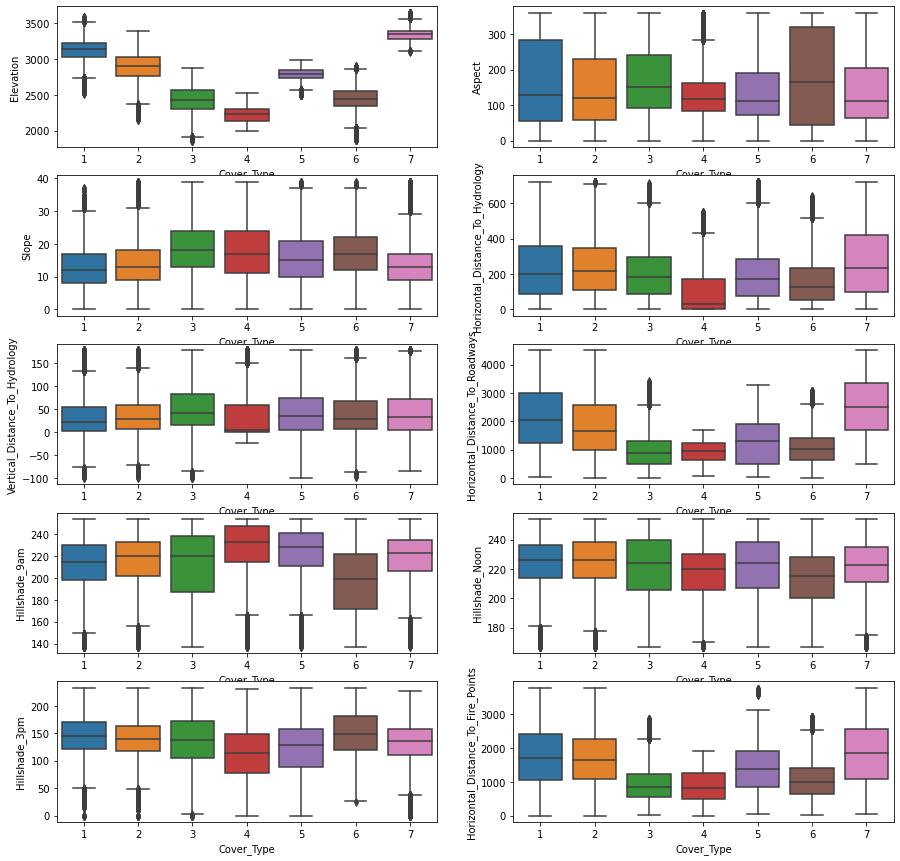

In [45]:
fig , ax = plt.subplots(5,2,figsize=(15,15))
counter = 0
for i in range(5):
    for x in range(2):
        sns.boxplot(y = df1[numeric[counter]] , x = df1["Cover_Type"], ax=ax[i,x],whis=1.5)
        counter +=1

In [46]:
len(df) - len(df1)

49091

In [52]:
df1.shape

(198388, 55)

In [47]:
df1.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
247472,2714,127,11,0,0,1444,238,232,122,1378,...,0,0,0,0,0,0,0,0,0,5
247473,2611,111,14,345,66,1561,243,223,106,1789,...,0,0,0,0,0,0,0,0,0,3
247475,2872,90,31,251,147,2027,248,172,27,508,...,0,0,0,0,0,0,0,0,0,5
247476,2336,57,5,0,0,1429,224,228,139,387,...,0,0,0,0,0,0,0,0,0,4
247477,2563,181,10,0,0,1349,223,246,156,1007,...,0,0,0,0,0,0,0,0,0,5


In [49]:
df1 = df1.reset_index(drop=True)

In [50]:
df1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
2,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
3,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7
4,2855,162,5,85,4,2899,224,241,151,2568,...,0,0,0,0,0,0,0,0,0,2


In [51]:
df1.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
198383,2714,127,11,0,0,1444,238,232,122,1378,...,0,0,0,0,0,0,0,0,0,5
198384,2611,111,14,345,66,1561,243,223,106,1789,...,0,0,0,0,0,0,0,0,0,3
198385,2872,90,31,251,147,2027,248,172,27,508,...,0,0,0,0,0,0,0,0,0,5
198386,2336,57,5,0,0,1429,224,228,139,387,...,0,0,0,0,0,0,0,0,0,4
198387,2563,181,10,0,0,1349,223,246,156,1007,...,0,0,0,0,0,0,0,0,0,5


In [53]:
df1.shape

(198388, 55)



```
# This is formatted as code
```

### My target column is `Cover_Type`. So let's take a close look at this column.

In [56]:
for i in range(1,8) :
    print("the shape of the value of", i, df1[df1["Cover_Type"] == i].shape)

the shape of the value of 1 (25891, 55)
the shape of the value of 2 (25321, 55)
the shape of the value of 3 (28630, 55)
the shape of the value of 4 (32517, 55)
the shape of the value of 5 (29766, 55)
the shape of the value of 6 (30935, 55)
the shape of the value of 7 (25328, 55)


<AxesSubplot:xlabel='Cover_Type', ylabel='Size'>

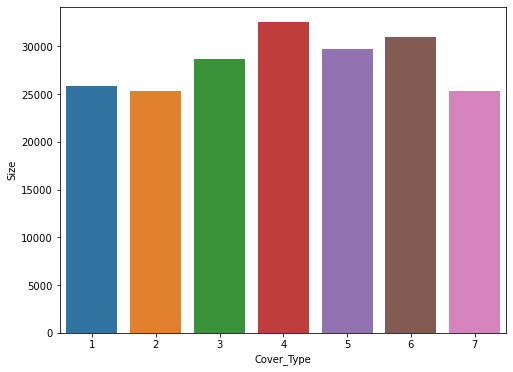

In [57]:
class_tree = df1.groupby('Cover_Type').size()
class_label = pd.DataFrame(class_tree,columns = ['Size'])
plt.figure(figsize = (8,6))
sns.barplot(x = class_label.index, y = 'Size', data = class_label)

In [58]:
for i, number in enumerate(class_tree):
    percent = (number/class_tree.sum())
    print('Cover_Type', class_tree.index[i])
    print('%.2f'% percent)

Cover_Type 1
0.13
Cover_Type 2
0.13
Cover_Type 3
0.14
Cover_Type 4
0.16
Cover_Type 5
0.15
Cover_Type 6
0.16
Cover_Type 7
0.13


- We can see that we have balanced data (`Cover_Type`). But, additionally I would like to check the distribution of each class of ``Cover_Type`` in terms of percentages.

### Now, let's take a closer look at correlation of continuous columns.

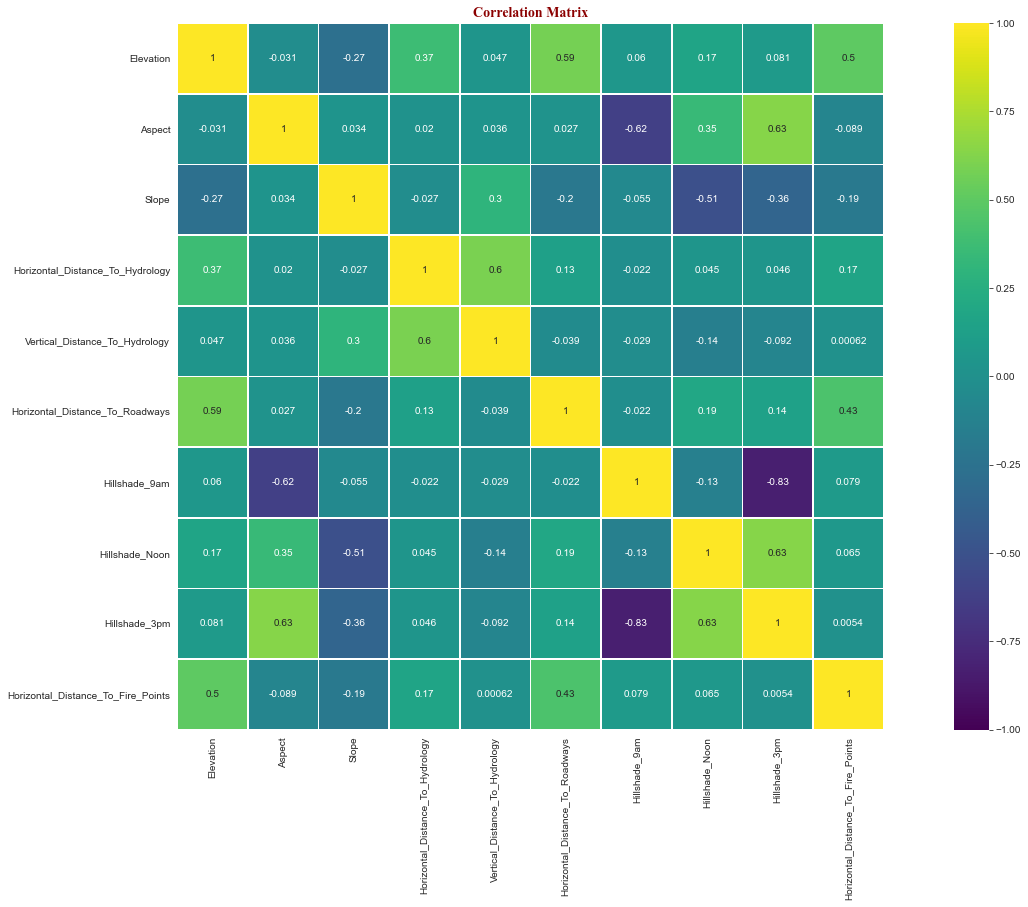

In [61]:
corr_matrix = df1[numeric].corr()

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix,square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)

plt.show()

>### Summary results :
>- ``Hillshade_3pm`` and ``Hillshade_9am`` are highly correlated. So I decided to drop ``Hillshade_3pm``.
>- ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns somehow are not correlated enough, so I decided to transform a new column derived from these two columns.
>- ``Horizontal_Distance_To_Hydrology`` and ``Horizontal_Distance_To_Roadways`` are not correlated, so I decided to transform a new column derived from these two columns.
>- ``Vertical_Distance_To_Hydrology`` and ``Elevation`` are not correlated, so I decided to transform a new column derived from these two columns.

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198388 entries, 0 to 198387
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           198388 non-null  int64
 1   Aspect                              198388 non-null  int64
 2   Slope                               198388 non-null  int64
 3   Horizontal_Distance_To_Hydrology    198388 non-null  int64
 4   Vertical_Distance_To_Hydrology      198388 non-null  int64
 5   Horizontal_Distance_To_Roadways     198388 non-null  int64
 6   Hillshade_9am                       198388 non-null  int64
 7   Hillshade_Noon                      198388 non-null  int64
 8   Hillshade_3pm                       198388 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  198388 non-null  int64
 10  Wilderness_Area_1                   198388 non-null  int64
 11  Wilderness_Area_2                   198388 non-null 

In [63]:
df1.to_csv("covtype_EDA.csv", index = False)

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [64]:
df1["Square_Hypo_Distance"] = ((df1.Horizontal_Distance_To_Hydrology ** 2) + 
                                 (df1.Vertical_Distance_To_Hydrology ** 2))

In [66]:
df1["Average_Dist_Road_Hydro"] = (df1.Horizontal_Distance_To_Hydrology + df1.Horizontal_Distance_To_Roadways)/2 

In [67]:
df1["Average_Elevation_Hydro"] = (df1.Elevation + df1.Vertical_Distance_To_Hydrology) /2

In [68]:
df1.drop([
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Elevation"
], axis=1, inplace=True)

In [69]:
numeric = []

for col in df1.columns:
    if df1[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Square_Hypo_Distance', 'Average_Dist_Road_Hydro', 'Average_Elevation_Hydro']


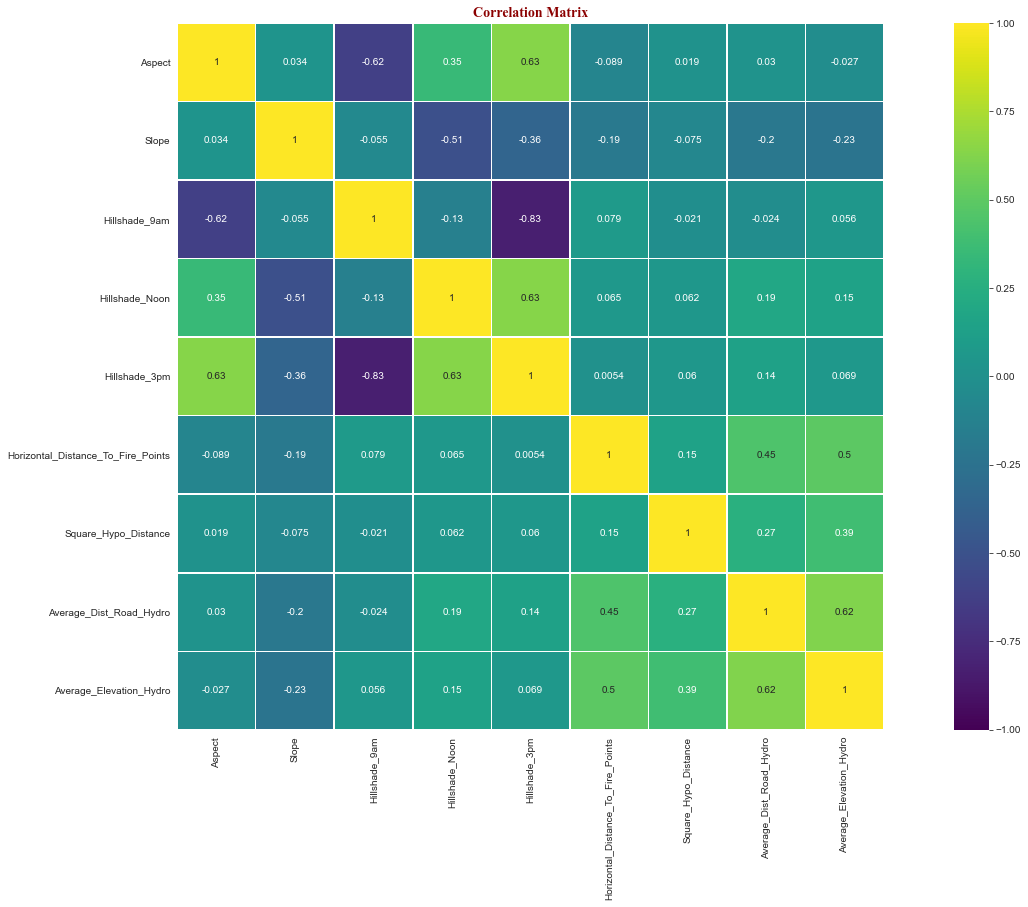

In [70]:
corr_matrix = df1[numeric].corr()

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix,square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)

plt.show()

In [72]:
df1.to_csv("covtype2.csv", index = False)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [74]:
df = pd.read_csv("covtype2.csv")

In [75]:
df.head()

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,123,10,237,231,123,2113,0,0,1,0,...,0,0,0,0,0,0,6,47248,1228.5,1372.0
1,322,18,170,217,185,1330,1,0,0,0,...,0,0,0,1,0,0,7,130532,2357.5,1693.5
2,89,31,248,173,29,889,0,0,1,0,...,0,0,0,0,0,0,5,103525,795.0,1511.0
3,93,12,239,221,110,945,0,0,1,0,...,0,0,0,0,0,0,7,270973,538.5,1683.0
4,162,5,224,241,151,2568,1,0,0,0,...,0,0,0,0,0,0,2,7241,1492.0,1429.5


In [77]:
X = df.drop("Cover_Type", axis = 1)
y = df["Cover_Type"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=101)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [79]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [80]:
modelSVM =  SVC(kernel="linear") # takes approximitely 20 mins to fit

In [81]:
modelSVM = LinearSVC(max_iter=2000)

In [82]:
modelSVM = SVC(kernel="linear", max_iter=2000) #lower scores and much more time to fit- about 8 mins

In [83]:
from sklearn.ensemble import BaggingClassifier
modelSVM = BaggingClassifier(SVC(kernel="linear"), n_jobs=-1, max_samples=.1,n_estimators=5) # we drop the model computional complexity with bagging and that gives us better time and better accuracy

In [84]:
modelSVM.fit(X_train_scaled , y_train)

BaggingClassifier(base_estimator=SVC(kernel='linear'), max_samples=0.1,
                  n_estimators=5, n_jobs=-1)

In [85]:
y_pred_test = modelSVM.predict(X_test_scaled)
y_pred_train = modelSVM.predict(X_train_scaled)

In [86]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.7027571954231564,
 0.7037610444225216,
 0.6954799129234168,
 0.6963539576291004)

TEST REPORT
              precision    recall  f1-score   support

           1       0.64      0.66      0.65      7767
           2       0.57      0.50      0.54      7596
           3       0.60      0.53      0.56      8589
           4       0.80      0.91      0.85      9755
           5       0.73      0.79      0.76      8930
           6       0.66      0.65      0.65      9281
           7       0.88      0.84      0.86      7599

    accuracy                           0.70     59517
   macro avg       0.70      0.70      0.70     59517
weighted avg       0.70      0.70      0.70     59517




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.64      0.67      0.66     18124
           2       0.57      0.51      0.54     17725
           3       0.60      0.53      0.56     20041
           4       0.80      0.91      0.85     22762
           5       0.73      0.79      0.7

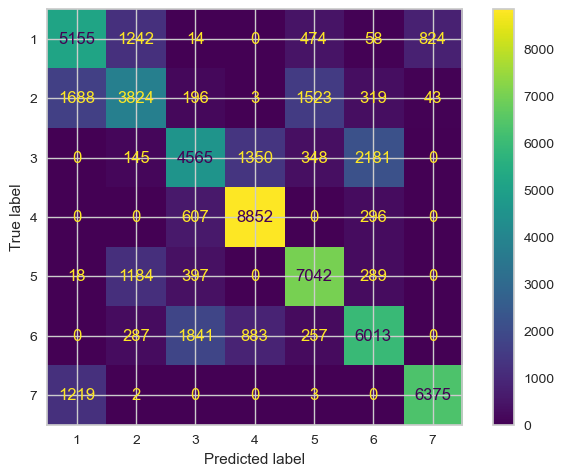

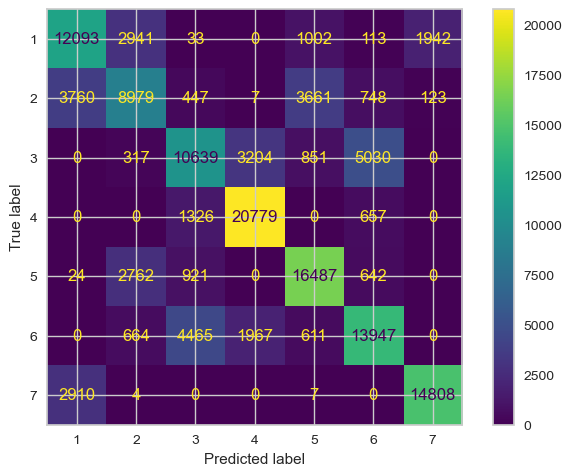

In [87]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(modelSVM, X_test_scaled, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(modelSVM, X_train_scaled, y_train);

In [88]:
param_grid = {
    'base_estimator__C': np.linspace(0.01,1, 3),
}

In [89]:
model = BaggingClassifier(SVC(kernel="linear"), n_jobs=-1, max_samples=.1,n_estimators=5,random_state=6)
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="f1_macro",
                              refit=True,
                              n_jobs=-1)

svm_model_grid.fit(X_train_scaled, y_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                         max_samples=0.1, n_estimators=5,
                                         n_jobs=-1, random_state=6),
             n_jobs=-1,
             param_grid={'base_estimator__C': array([0.01 , 0.505, 1.   ])},
             scoring='f1_macro', verbose=2)

In [90]:
svm_model_grid.best_params_

{'base_estimator__C': 1.0}

In [91]:
svm_model_grid.best_estimator_

BaggingClassifier(base_estimator=SVC(kernel='linear'), max_samples=0.1,
                  n_estimators=5, n_jobs=-1, random_state=6)

In [92]:
y_pred_test = svm_model_grid.predict(X_test_scaled)
y_pred_train = svm_model_grid.predict(X_train_scaled)

In [93]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.6998000571265353,
 0.7014711494840535,
 0.6930095002661038,
 0.6948361316621577)

TEST REPORT
              precision    recall  f1-score   support

           1       0.65      0.65      0.65      7767
           2       0.56      0.51      0.54      7596
           3       0.59      0.53      0.56      8589
           4       0.80      0.90      0.85      9755
           5       0.72      0.78      0.75      8930
           6       0.66      0.65      0.65      9281
           7       0.88      0.85      0.86      7599

    accuracy                           0.70     59517
   macro avg       0.69      0.69      0.69     59517
weighted avg       0.69      0.70      0.70     59517




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.65      0.65      0.65     18124
           2       0.57      0.52      0.54     17725
           3       0.58      0.53      0.56     20041
           4       0.80      0.91      0.85     22762
           5       0.72      0.78      0.7

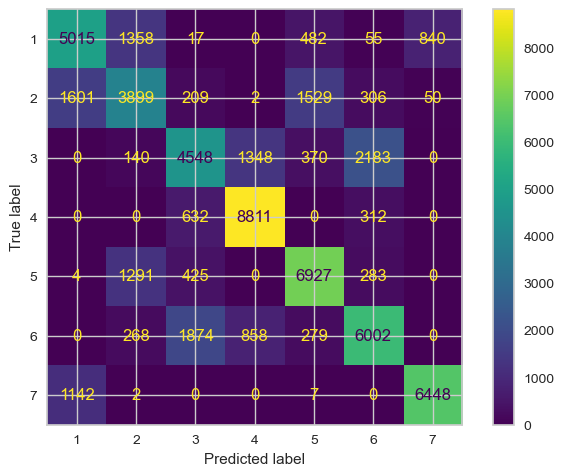

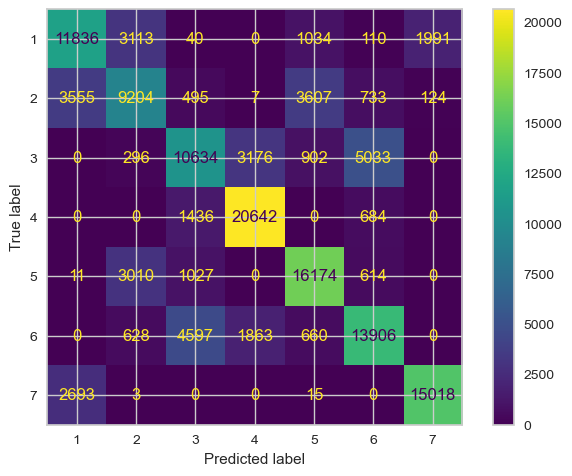

In [94]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(svm_model_grid, X_test_scaled, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(svm_model_grid, X_train_scaled, y_train);

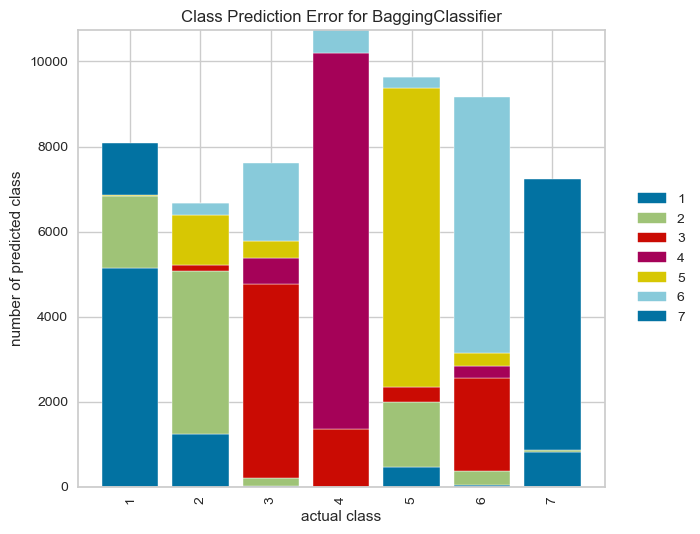

<AxesSubplot:title={'center':'Class Prediction Error for BaggingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [95]:
from yellowbrick.classifier import ClassPredictionError


visualizer = ClassPredictionError(modelSVM)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()

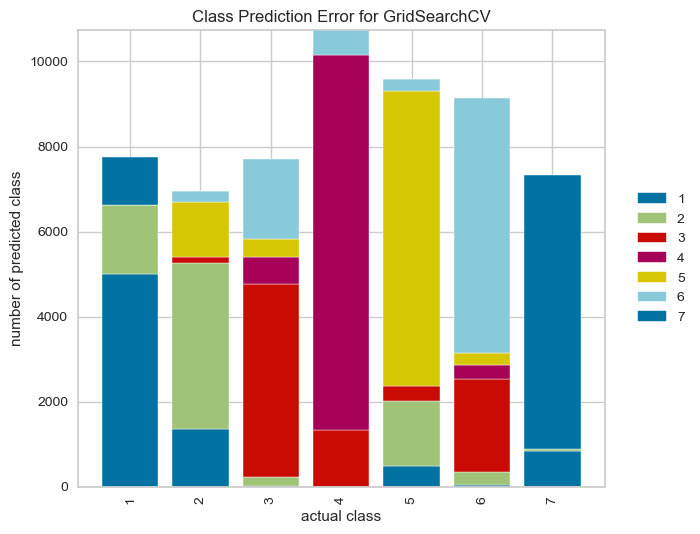

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [96]:
visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()


- We can see from the plots that more than half of the classes are predicted correctly. But the model predicted 5 classes although there are 7. Class 5 and 7 could not detected.

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [97]:
modelTree = DecisionTreeClassifier()

modelTree.fit(X_train , y_train)

DecisionTreeClassifier()

In [98]:
modelTree = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, max_samples=.1,n_estimators=10)

modelTree.fit(X_train , y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.1,
                  n_jobs=-1)

In [99]:
y_pred_test = modelTree.predict(X_test)
y_pred_train = modelTree.predict(X_train)

In [100]:
modelTree_accuracy_test = accuracy_score(y_test, y_pred_test)
modelTree_accuracy_train = accuracy_score(y_train, y_pred_train)

modelTree_f1_test = f1_score(y_test, y_pred_test, average='macro')
modelTree_f1_train = f1_score(y_train, y_pred_train, average='macro')

modelTree_accuracy_test, modelTree_accuracy_train, modelTree_f1_test, modelTree_f1_train

(0.8866878370885629,
 0.9091819026290586,
 0.8795653910748508,
 0.9037113373100732)

TEST REPORT
              precision    recall  f1-score   support

           1       0.78      0.80      0.79      7767
           2       0.80      0.66      0.73      7596
           3       0.88      0.87      0.87      8589
           4       0.96      0.99      0.97      9755
           5       0.91      0.97      0.94      8930
           6       0.89      0.90      0.90      9281
           7       0.95      0.97      0.96      7599

    accuracy                           0.89     59517
   macro avg       0.88      0.88      0.88     59517
weighted avg       0.88      0.89      0.88     59517




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.82      0.84      0.83     18124
           2       0.85      0.72      0.78     17725
           3       0.91      0.90      0.90     20041
           4       0.96      0.99      0.98     22762
           5       0.92      0.98      0.9

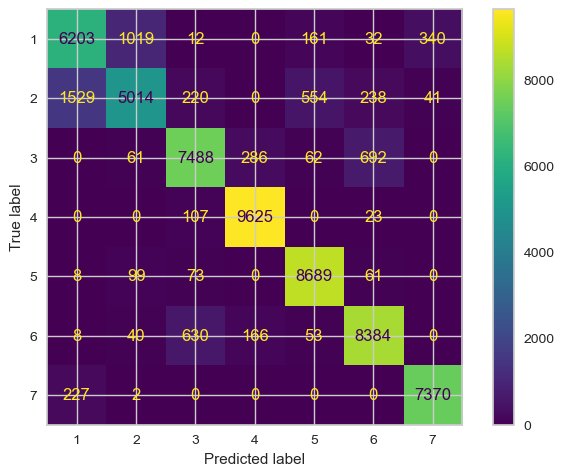

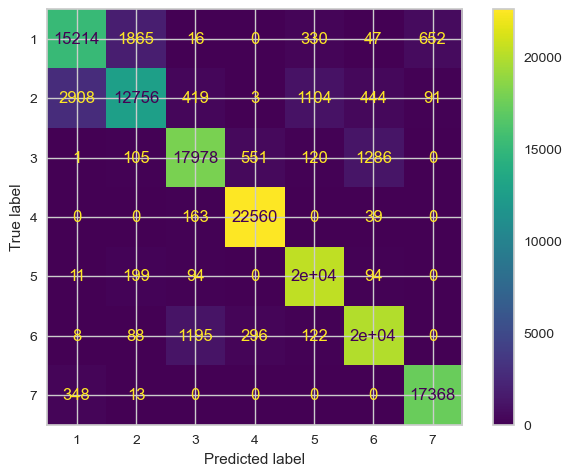

In [101]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(modelTree, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(modelTree, X_train, y_train);

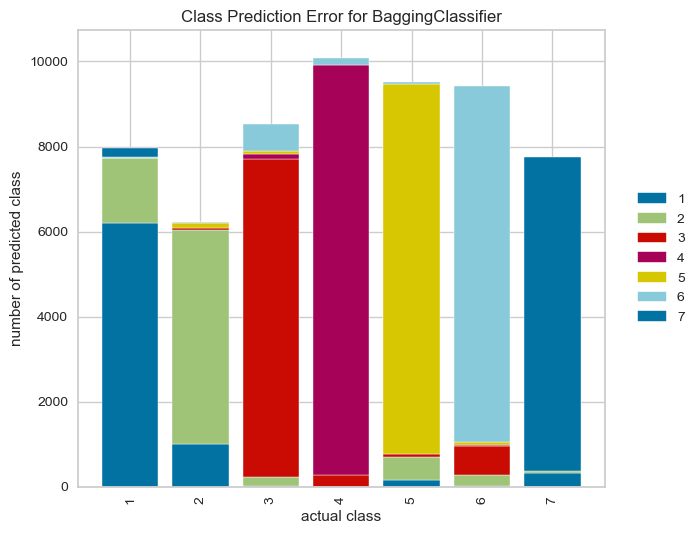

<AxesSubplot:title={'center':'Class Prediction Error for BaggingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [102]:
visualizer = ClassPredictionError(modelTree)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [103]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [105]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9518120873027874, 1.0, 0.9486382151298818, 1.0)

TEST REPORT
              precision    recall  f1-score   support

           1       0.91      0.88      0.89      7767
           2       0.89      0.85      0.87      7596
           3       0.96      0.95      0.95      8589
           4       0.98      1.00      0.99      9755
           5       0.97      0.99      0.98      8930
           6       0.95      0.98      0.96      9281
           7       0.98      1.00      0.99      7599

    accuracy                           0.95     59517
   macro avg       0.95      0.95      0.95     59517
weighted avg       0.95      0.95      0.95     59517




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     18124
           2       1.00      1.00      1.00     17725
           3       1.00      1.00      1.00     20041
           4       1.00      1.00      1.00     22762
           5       1.00      1.00      1.0

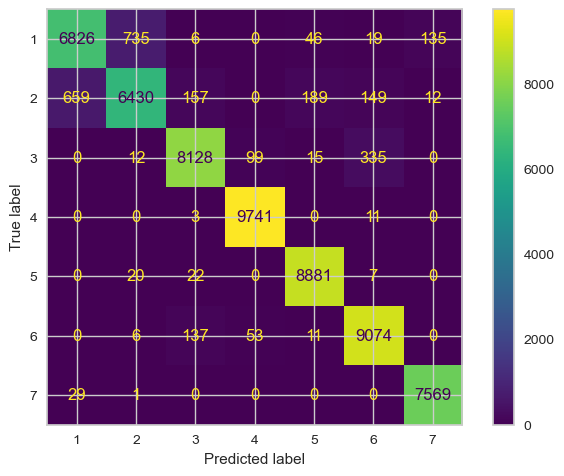

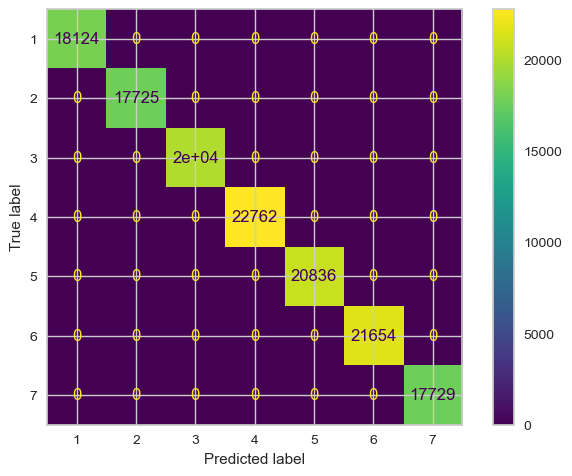

In [106]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(rfc, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(rfc, X_train, y_train);

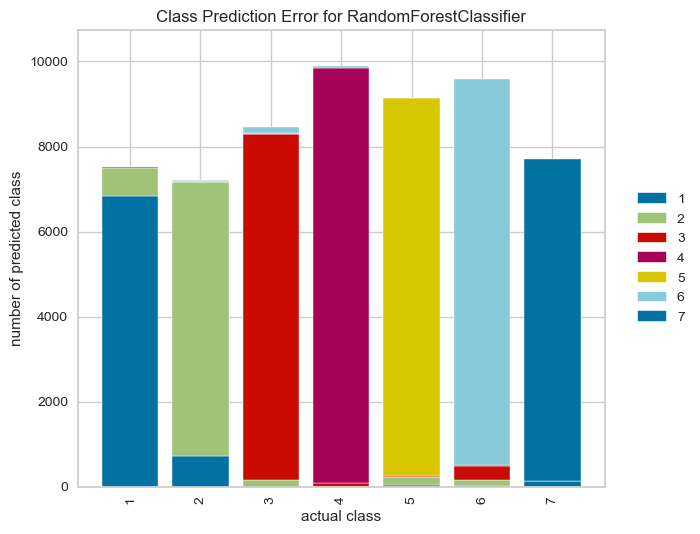

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [107]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

#### RF GridsearchCV

In [108]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16],
             'min_samples_split':[2,6,10],
             }

In [109]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             refit=True,
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 13, 16],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [30, 100, 200]},
             scoring='accuracy', verbose=2)

In [110]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_split': 2,
 'n_estimators': 200}

In [111]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [112]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9121595510526405,
 0.9524882804905271,
 0.9069740258895546,
 0.9506568949625438)

TEST REPORT
              precision    recall  f1-score   support

           1       0.87      0.82      0.84      7767
           2       0.86      0.74      0.79      7596
           3       0.93      0.86      0.89      8589
           4       0.96      0.99      0.98      9755
           5       0.91      0.99      0.94      8930
           6       0.89      0.95      0.92      9281
           7       0.97      0.99      0.98      7599

    accuracy                           0.91     59517
   macro avg       0.91      0.91      0.91     59517
weighted avg       0.91      0.91      0.91     59517




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.95      0.91      0.93     18124
           2       0.94      0.86      0.90     17725
           3       0.97      0.91      0.94     20041
           4       0.98      1.00      0.99     22762
           5       0.93      0.99      0.9

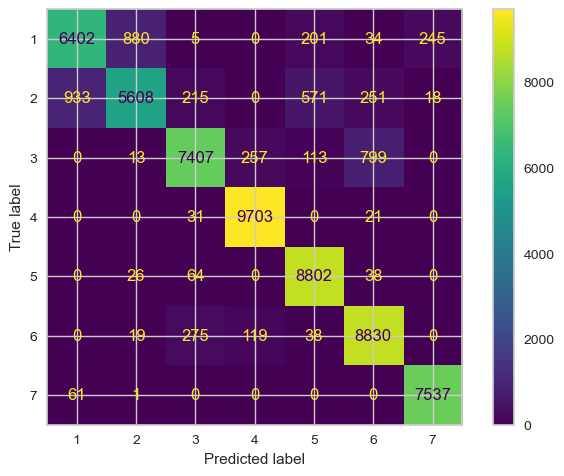

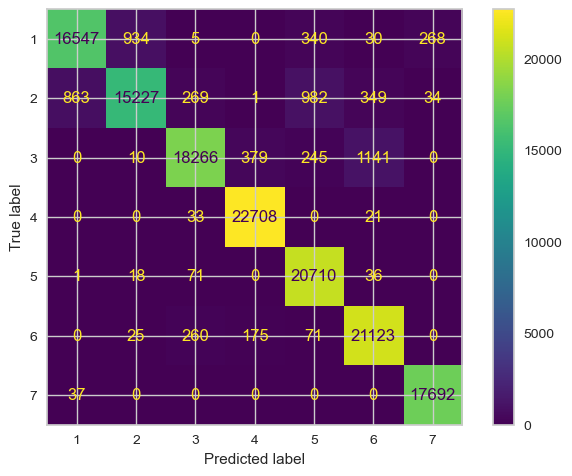

In [113]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(rf_grid_model, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(rf_grid_model, X_train, y_train);

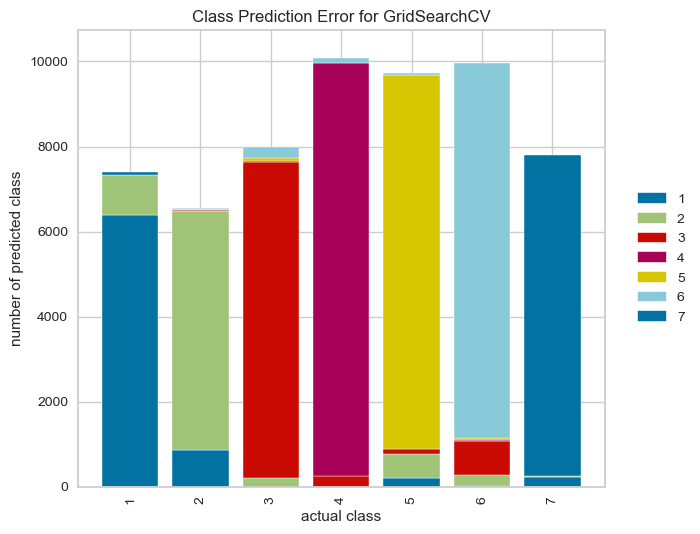

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [114]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [115]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

[01:04:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [116]:
y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

In [117]:
xgb_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_f1_test = f1_score(y_test, y_pred_test, average='macro')
xgb_f1_train = f1_score(y_train, y_pred_train, average='macro')

xgb_accuracy_test, xgb_accuracy_train, xgb_f1_test, xgb_f1_train

(0.9145454239965052,
 0.9376039633904847,
 0.9088509621173922,
 0.9337652247917999)

TEST REPORT
              precision    recall  f1-score   support

           1       0.84      0.82      0.83      7767
           2       0.84      0.74      0.79      7596
           3       0.93      0.88      0.90      8589
           4       0.98      1.00      0.99      9755
           5       0.93      0.99      0.96      8930
           6       0.90      0.95      0.92      9281
           7       0.96      0.99      0.98      7599

    accuracy                           0.91     59517
   macro avg       0.91      0.91      0.91     59517
weighted avg       0.91      0.91      0.91     59517




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.88      0.87      0.88     18124
           2       0.89      0.80      0.84     17725
           3       0.95      0.91      0.93     20041
           4       0.99      1.00      0.99     22762
           5       0.95      0.99      0.9

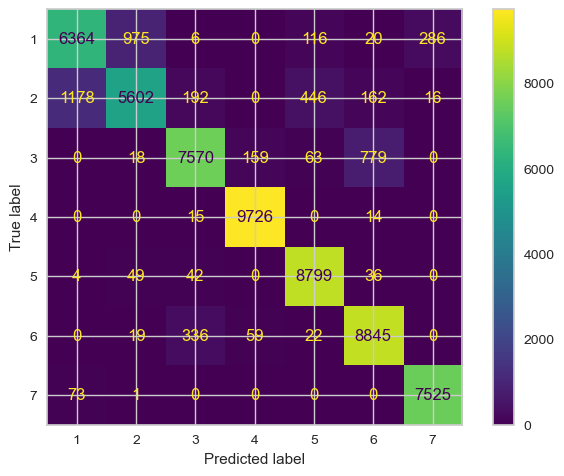

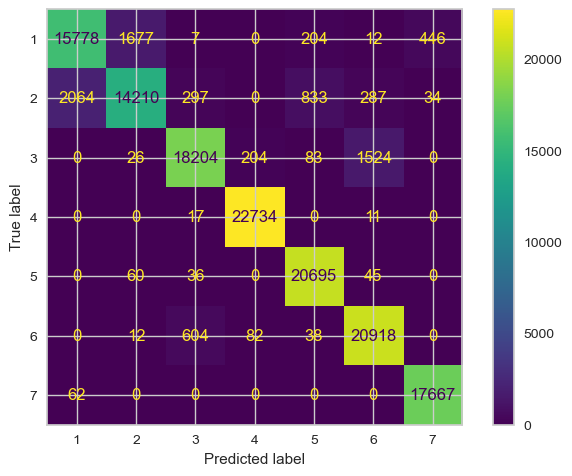

In [118]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(xgb_classifier, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(xgb_classifier, X_train, y_train);

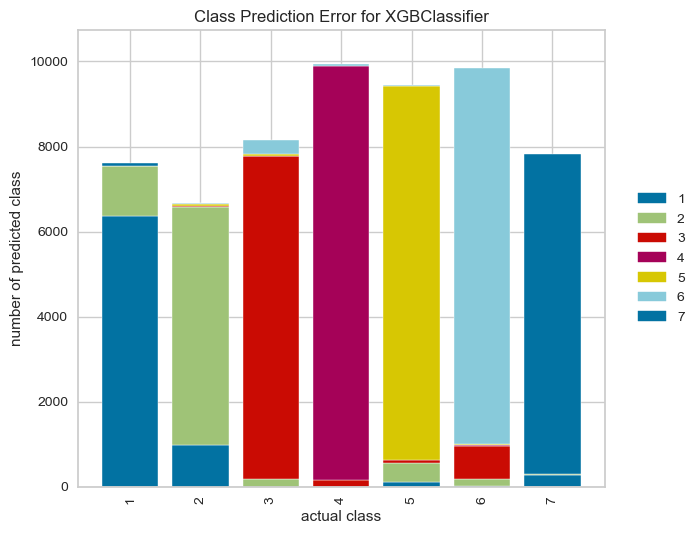

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [119]:
visualizer = ClassPredictionError(xgb_classifier)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

Text(0.5, 1.0, 'Test Accuracy Score of Different Models')

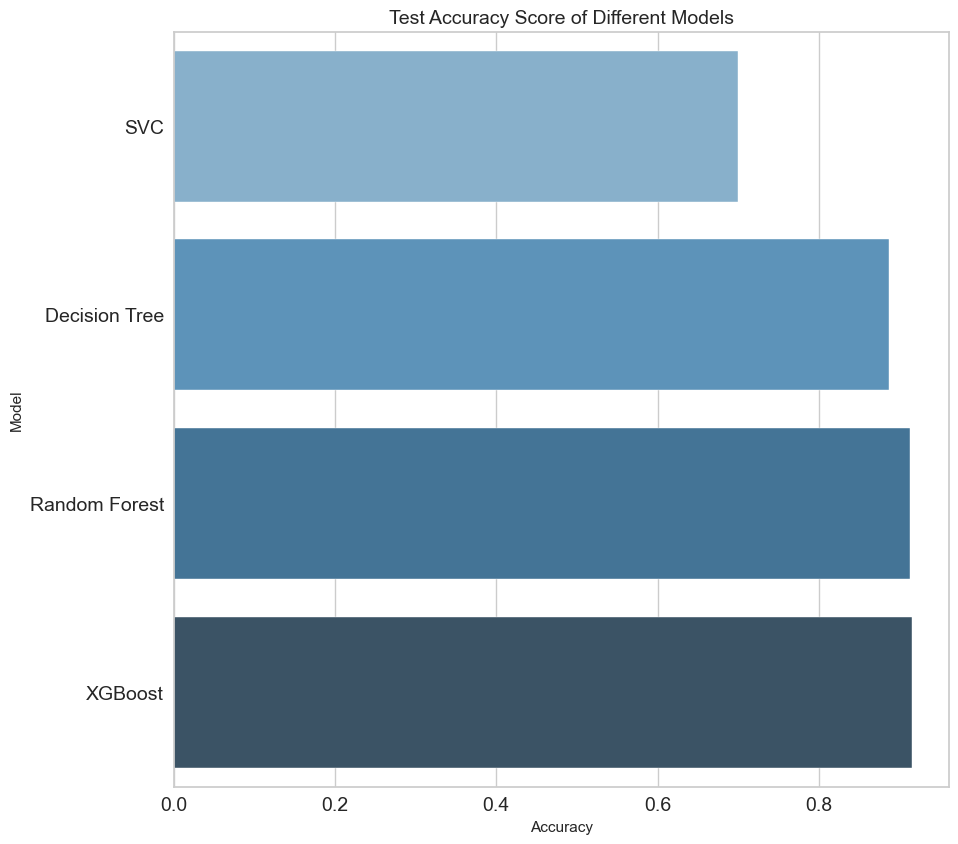

In [120]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [SVM_accuracy_test, rfc_accuracy_test, xgb_accuracy_test, modelTree_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14)

Text(0.5, 1.0, 'Train Accuracy Score of Different Models')

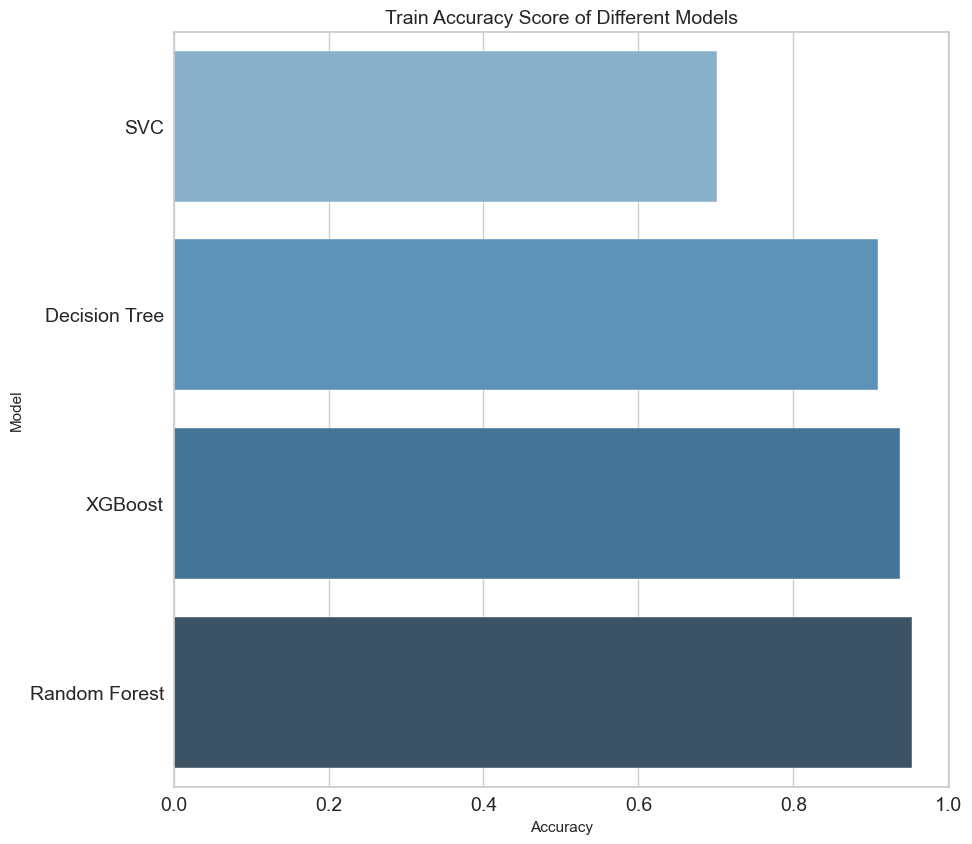

In [121]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [SVM_accuracy_train, rfc_accuracy_train, xgb_accuracy_train, modelTree_accuracy_train]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Train Accuracy Score of Different Models", size=14)

# F1 Score Comparison

Text(0.5, 1.0, 'Train Accuracy Score of Different Models')

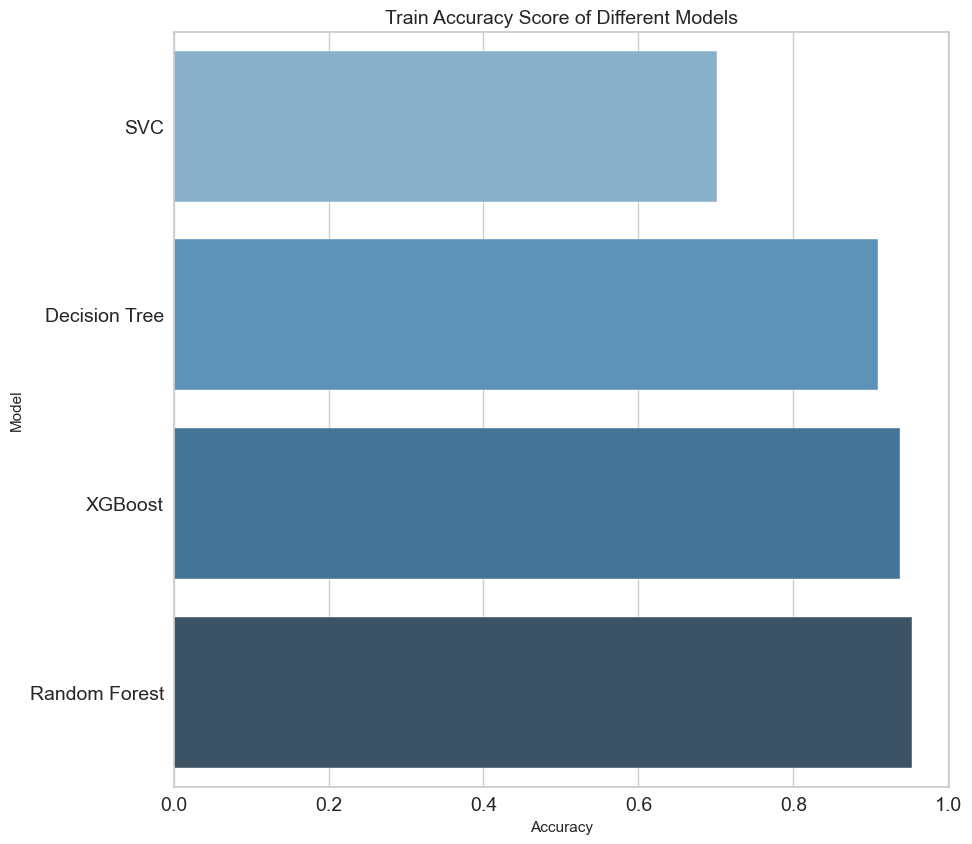

In [122]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [SVM_accuracy_train, rfc_accuracy_train, xgb_accuracy_train, modelTree_accuracy_train]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Train Accuracy Score of Different Models", size=14)

Text(0.5, 1.0, 'Train F1 Score of Different Models')

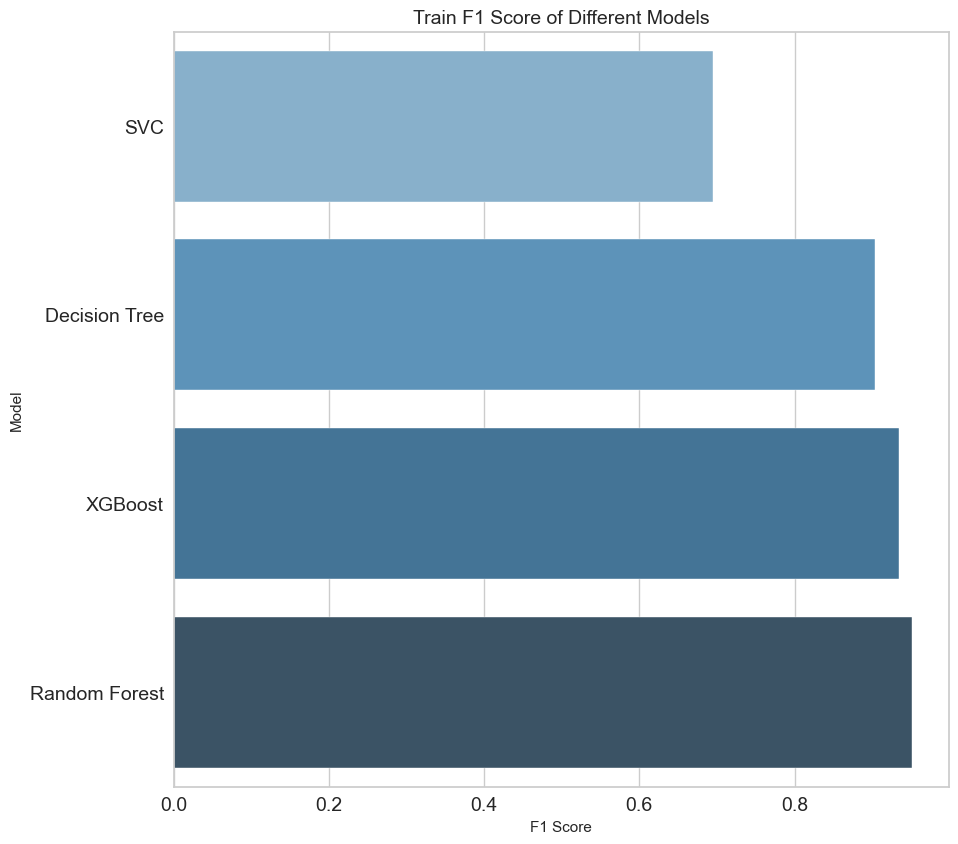

In [123]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "F1 Score": [svm_f1_train, rfc_f1_train, xgb_f1_train, modelTree_f1_train]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Train F1 Score of Different Models", size=14)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___